In [179]:
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
import re
import pandas as pd
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import dash
from dash import html
from dash import dcc
import plotly.express as px
import pandas as pd
import plotly.express as px
import dash
from dash import html
from dash import dcc


In [180]:
pip install dash

In [181]:
pip install textblob 

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

In [182]:
# Create a file path
filepath = "../Resources/data.csv"
# Read in the data.
df = pd.read_csv(filepath)
df.head()

,Card,Quantity,Pilot,Archetype,Event,Date Posted,Main/Sideboard,Mana Value,Mana Cost,Colours,Most Recent Printing,Card Text,Type Line,Price EUR,Price USD,Rarity
0,Hallowed Fountain,4,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2019-01-25,({T}: Add {W} or {U}.)\r\nAs Hallowed Fountain...,Land — Plains Island,11.93,11.31,rare
1,Prairie Stream,2,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2023-04-21,({T}: Add {W} or {U}.)\r\nPrairie Stream enter...,Land — Plains Island,0.21,0.16,rare
2,Irrigated Farmland,4,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2020-04-17,({T}: Add {W} or {U}.)\r\nIrrigated Farmland e...,Land — Plains Island,0.76,0.96,rare
3,Field of Ruin,2,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2023-04-21,"{T}: Add {C}.\r\n{2}, {T}, Sacrifice Field of ...",Land,0.05,0.15,uncommon
4,Fabled Passage,4,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2020-07-03,"{T}, Sacrifice Fabled Passage: Search your lib...",Land,3.70,4.80,rare


In [183]:
#This will drop null values from the Price USD column 
price_drop_df = df.dropna(subset=['Price USD'])

In [184]:
price_drop_df["Printing Dates"]=pd.to_datetime(df["Most Recent Printing"])

C:\Users\laura\AppData\Local\Temp\ipykernel_25236\3365663772.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [185]:
today = pd.Timestamp("2024-06-03")

In [186]:
price_drop_df["Printing Age"] = (today-price_drop_df["Printing Dates"]).dt.days

C:\Users\laura\AppData\Local\Temp\ipykernel_25236\1334779434.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [187]:
price_drop_df #the dataframe for the linregress

,Card,Quantity,Pilot,Archetype,Event,Date Posted,Main/Sideboard,Mana Value,Mana Cost,Colours,Most Recent Printing,Card Text,Type Line,Price EUR,Price USD,Rarity,Printing Dates,Printing Age
0,Hallowed Fountain,4,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2019-01-25,({T}: Add {W} or {U}.)\r\nAs Hallowed Fountain...,Land — Plains Island,11.93,11.31,rare,2019-01-25,1956
1,Prairie Stream,2,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2023-04-21,({T}: Add {W} or {U}.)\r\nPrairie Stream enter...,Land — Plains Island,0.21,0.16,rare,2023-04-21,409
2,Irrigated Farmland,4,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2020-04-17,({T}: Add {W} or {U}.)\r\nIrrigated Farmland e...,Land — Plains Island,0.76,0.96,rare,2020-04-17,1508
3,Field of Ruin,2,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2023-04-21,"{T}: Add {C}.\r\n{2}, {T}, Sacrifice Field of ...",Land,0.05,0.15,uncommon,2023-04-21,409
4,Fabled Passage,4,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2020-07-03,"{T}, Sacrifice Fabled Passage: Search your lib...",Land,3.70,4.80,rare,2020-07-03,1431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2301,The Chain Veil,1,Pilot 8,Mono-Green Devotion,MTG SEA Championship,2023-06-08,Sideboard,4.0,{4},[],2014-07-18,"At the beginning of your end step, if you didn...",Legendary Artifact,18.83,26.69,mythic,2014-07-18,3608
2302,Tormod's Crypt,1,Pilot 8,Mono-Green Devotion,MTG SEA Championship,2023-06-08,Sideboard,0.0,NaN,[],2020-07-03,"{T}, Sacrifice Tormod's Crypt: Exile target pl...",Artifact,0.31,0.24,uncommon,2020-07-03,1431
2303,Voracious Hydra,2,Pilot 8,Mono-Green Devotion,MTG SEA Championship,2023-06-08,Sideboard,2.0,{X}{G}{G},['G'],2019-07-12,Trample\r\nVoracious Hydra enters the battlefi...,Creature — Hydra,1.31,4.21,rare,2019-07-12,1788
2304,Treasure Vault,1,Pilot 8,Mono-Green Devotion,MTG SEA Championship,2023-06-08,Sideboard,0.0,NaN,[],2021-07-23,"{T}: Add {C}.\r\n{X}{X}, {T}, Sacrifice Treasu...",Artifact Land,8.55,4.78,rare,2021-07-23,1046


In [188]:
card_count = len(df["Card"].unique())

In [189]:
card_count

460

In [191]:
cards = df['Card'].unique()
cards_list = cards.tolist()

In [192]:
cards

array(['Hallowed Fountain', 'Prairie Stream', 'Irrigated Farmland',
       'Field of Ruin', 'Fabled Passage', 'Castle Ardenvale',
       'Castle Vantress', 'Otawara, Soaring City', 'Hall of Storm Giants',
       'Lay Down Arms', 'Farewell', 'Rewind',
       'March of Otherworldly Light', 'Mystical Dispute',
       'Hallowed Moonlight', 'Absorb', 'Censor', "Dovin's Veto",
       'The Celestus', 'Shark Typhoon', 'Make Disappear',
       'Teferi, Hero of Dominaria', 'Narset, Parter of Veils',
       'The Wandering Emperor', 'Change the Equation', 'Dig Through Time',
       'Island', 'Plains', 'Disdainful Stroke', 'Temporary Lockdown',
       'Aether Gust', 'Dream Trawler', 'Commit // Memory',
       'Unlicensed Hearse', 'Zirda, the Dawnwaker', 'Arboreal Grazer',
       'Boseiju, Who Endures', 'Lair of the Hydra',
       'Lier, Disciple of the Drowned', 'Hidden Strings',
       'Behold the Beyond', 'Breeding Pool', 'Dark Petition',
       'Bala Ged Recovery', 'Omniscience', 'Impulse',
    

In [193]:
today = pd.Timestamp("2024-06-03")

In [ ]:

# Convert the current date to a datetime object


# Assuming 'Date Posted' column contains date information
# Calculate the age based on the 'Date Posted' column
df["Printing Age"] = (today - df["Printing Dates"]).dt.days

df.head()

In [ ]:
print(df.columns)

In [195]:
# Sample dataframe with 'Card' column
df = pd.DataFrame({'Card': cards_list})

# Tokenize and count word frequencies
keyword_frequency = {}

# List of common stopwords to exclude
stopwords = ['the', 'a', 'an', 'and', ',', ':', ';', '.', '!', '?']  

# Iterate through each card name
for card in df['Card']:
    # Extract keywords using TextBlob
    blob = TextBlob(card)
    keywords = [word.lower() for word in blob.words if word.lower() not in stopwords and len(word) > 2]  # Exclude short words
    # Update frequency count for each keyword
    for keyword in keywords:
        if keyword in keyword_frequency:
            keyword_frequency[keyword] += 1
        else:
            keyword_frequency[keyword] = 1

# Sort the keyword frequency dictionary by frequency in descending order
sorted_keyword_frequency = dict(sorted(keyword_frequency.items(), key=lambda item: item[1], reverse=True))

# Print the sorted keyword frequency
for word, frequency in sorted_keyword_frequency.items():
    print(f"{word}: {frequency}")

pathway: 7
hope: 5
invasion: 5
triome: 5
castle: 4
command: 4
cathar: 4
light: 3
end: 3
sun: 3
forest: 3
chandra: 3
karn: 3
path: 3
sheoldred: 3
spirit: 3
god: 3
forge: 3
thalia: 3
hallowed: 2
field: 2
soaring: 2
storm: 2
otherworldly: 2
dispute: 2
teferi: 2
hero: 2
narset: 2
island: 2
plains: 2
memory: 2
who: 2
hydra: 2
behold: 2
impulse: 2
mastermind: 2
sylvan: 2
temple: 2
supreme: 2
dragonlord: 2
atarka: 2
giant: 2
kari: 2
zev: 2
phoenix: 2
monastery: 2
lightning: 2
defiance: 2
reckless: 2
ground: 2
shrine: 2
cavalier: 2
haven: 2
nissa: 2
cauldron: 2
mite: 2
veil: 2
crypt: 2
filigree: 2
sylex: 2
harvester: 2
word: 2
titan: 2
loch: 2
spell: 2
tomb: 2
into: 2
jwari: 2
disruption: 2
god-pharaoh: 2
voldaren: 2
jace: 2
prodigy: 2
saheeli: 2
third: 2
coast: 2
denial: 2
lantern: 2
roil: 2
garden: 2
raffine: 2
marsh: 2
devil: 2
claim: 2
leyline: 2
radiant: 2
dawn: 2
treasure: 2
omnath: 2
locus: 2
thraben: 2
clarion: 2
reef: 2
fountain: 1
prairie: 1
stream: 1
irrigated: 1
farmland: 1
ruin: 1

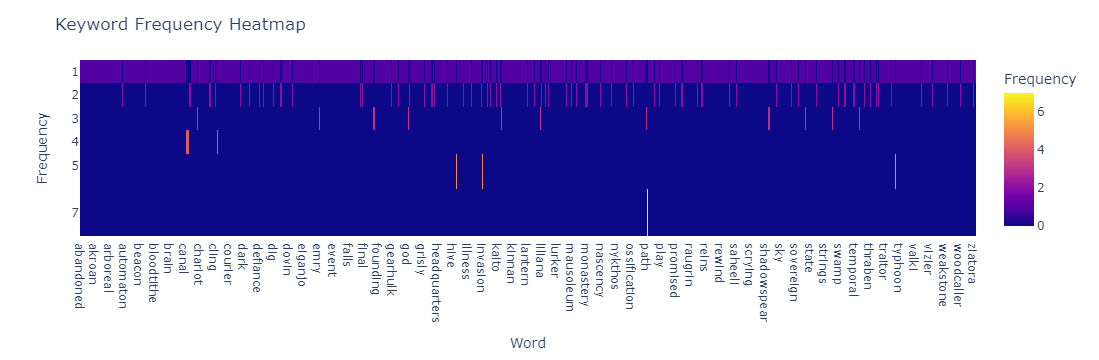

In [204]:
# Sort the DataFrame by frequency in descending order
df_heatmap_sorted = df_heatmap.sort_values(by='Frequency', ascending=False)

# Create a DataFrame with keyword frequencies (words as index, frequencies as values)
heatmap_data = df_heatmap_sorted.pivot(index='Frequency', columns='Word', values='Frequency').fillna(0)

# Create a heatmap
fig = px.imshow(heatmap_data, labels=dict(color='Frequency'), x=heatmap_data.columns, y=heatmap_data.index)

# Update layout
fig.update_layout(
    title="Keyword Frequency Heatmap",
    xaxis_title="Word",
    yaxis_title="Frequency"
)

# Ensure all frequency values are included in the y-axis ticks
fig.update_yaxes(tickmode='array', tickvals=df_heatmap_sorted['Frequency'])

# Show the plot
fig.show()

In [200]:
# Display only the 'printing dates' column
printing_dates_column = df['printing_dates']
print(printing_dates_column)

KeyError: 'printing_dates'

In [ ]:
# Convert 'printing dates' column to datetime
df['printing_dates'] = pd.to_datetime(df['printing_dates'])

# Display the 'printing dates' column as datetime
printing_dates_column = df['printing_dates']
print(printing_dates_column)

In [ ]:
publish_date, price

In [ ]:
# Convert 'price' column to numeric
df['Price USD'] = pd.to_numeric(df['Price USD'])

# Display the 'price' column as numeric
price_column = df['Price USD']
print(price_column)

In [ ]:
# Extract the 'printing_dates' and 'price' columns
publish_date = pd.to_numeric(df['Printing Age'], downcast='float')  # Corrected column name
price = df['Price USD']

# Create a scatter plot to visualize the relationship
plt.scatter(publish_date, price)
plt.xlabel('Publish Date')
plt.ylabel('Price')
plt.title('Publish Date vs Price')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(publish_date.dropna(),price.dropna())


# Create the equation of the line
line = slope * publish_date + intercept

# Plot the linear model over the scatter plot
plt.plot(publish_date, line, color='red', linestyle='--')

# Display the plot
plt.show()

In [ ]:
line

In [ ]:
slope, intercept, r_value, p_value, std_err

In [ ]:
publish_date

In [ ]:
price